# Getting started

This is my first colab notebook!

In [ ]:
import time
print(time.ctime())

Another time:

In [ ]:
time.sleep(5)
print(time.ctime())

Install needed libraries

What `!` actually does is, it tells the notebook cell that this line is not a Python code, its a command line script

In [ ]:
!apt-get -qq install -y libarchive-dev
!pip install -q -U libarchive
import libarchive

In [ ]:
!pip install -q matplotlib-venn
!apt-get -qq install -y libfluidsynth1

# Read & Display images by OpenCV

Import libraries

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

Download an image and display it.

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

Wrap them as a function:

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import os

def download_view(img_url):
  img_file = os.path.basename(img_url)
  !curl -o $img_file $img_url
  img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  return img_file

# Execute
img_url = "https://cdn.mos.cms.futurecdn.net/gXMT3NvriqiKAPoapwZZ9h-1200-80.jpg"
download_view(img_url)

# Take picture from Webcam

Run this code:

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to person.jpg


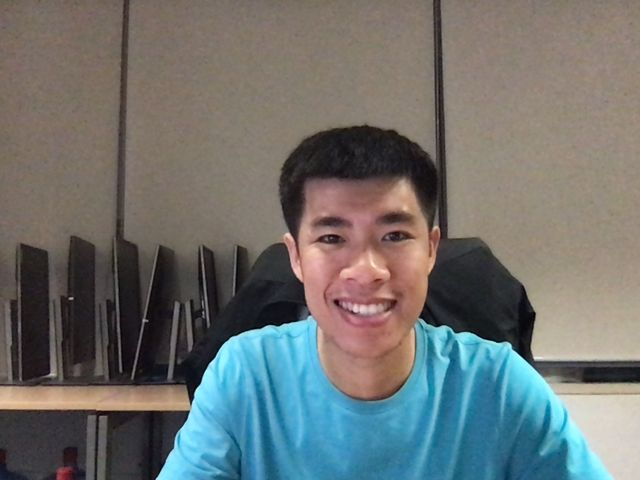

In [ ]:
from IPython.display import Image

try:
  filename = "person.jpg"
  img = take_photo(filename)
  print('Saved to {}'.format(img))
  
  # Show the image which was just taken.
  display(Image(img))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))